<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محموله بزرگ
</font>
</h1>


<p style="text-align:center;"><img src="pic1.jpg"></p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  ویدا عاشق شکلات است و بعد از دیدن تبلیغ شکلات‌های خارجی، نتوانست جلوی خود را بگیرد و یک محموله بزرگ شکلات سفارش داد! وقتی محموله رسید، ویدا با کوهی از شکلات‌های خفن روبرو شد که فرق آن‌ها را نمی‌دانست. خوشبختانه فروشنده‌ی این شکلات‌ها لیستی از مشخصات کامل هر شکلات برای ویدا فرستاد ولی آن‌جایی که ویدا چیز زیادی از این لیست سر در نمی‌آورد از شما می‌خواهد به او کمک کنید تا شکلات‌های مورد علاقه‌اش را زودتر پیدا کند و بخورد. بیایید با هم نگاهی به این لیست مشخصات بیاندازیم:

</font>
</p>


In [54]:
import numpy as np
import pandas as pd

df = pd.read_csv('chocolate.csv')
df.head()

,Company,Specific Bean\nOrigin,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,2016,63%,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70%,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,Blend,Peru


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  برای این که به حجم زیاد شکلات‌ها و مشخصات دقیقتر آن‌ها پی ببریم شکل و نام ستون‌های این مجموعه‌ی دادگان را در متغیر‌های زیر بریزید و چاپ کنید:
</font>
</p>


In [55]:
s = df.shape
cols = df.columns
print(s)
print(cols)

(1795, 8)
Index(['Company', 'Specific Bean\nOrigin', 'Review\nDate', 'Cocoa\nPercent',
       'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که دیدید، نام برخی از ستون‌ها دارای کاراکتر <code>n\</code> است که برای ایجاد خط جدید استفاده می‌شود اما در این جا به آن صورت نمایش داده نمی‌شود پس برای مرتب شدن مجموعه داده، نام ستون‌ها را به نوعی تغییر دهید که به جای کاراکتر <code>n\</code>، تنها از space استفاده شود.
</font>
</p>


In [56]:
df.columns = df.columns.str.replace("\n"," ")

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در کد پایین نگاهی به اطلاعات این مجموعه داده و تایپ ستون‌ها می‌اندازیم. سعی کنید قبل از ادامه، کمی آن‌ها را تحلیل کنید

</font>
</p>


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   object 
 4   Company Location      1795 non-null   object 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   object 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.3+ KB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که احتمالا متوجه شده‌اید، تمام ستون‌هایی که دارای دادگان از نوع رشته <code>string</code> هستند، به صورت <code>object</code> ذخیره شده‌اند که به دلیل نداشتن مقادیر خالی (که در فصل آینده با آن آشنا می‌شوید)، لزومی ندارد این ستون‌ها به صورت <code>object</code> باقی بمانند. برای راحتی محاسبات این ستون‌ها را به نوع رشته تغییر دهید و با دستور <code>info</code> از صحت انجام این کار مطمئن شوید.

</font>
</p>


In [58]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   string 
 1   Specific Bean Origin  1795 non-null   string 
 2   Review Date           1795 non-null   Int64  
 3   Cocoa Percent         1795 non-null   string 
 4   Company Location      1795 non-null   string 
 5   Rating                1795 non-null   Float64
 6   Bean Type             1795 non-null   string 
 7   Broad Bean Origin     1794 non-null   string 
dtypes: Float64(1), Int64(1), string(6)
memory usage: 115.8 KB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت چهارم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشکل بعدی، ستون درصد کاکائوی خالص <code>Cocoa Percent</code> است. همان‌طور که می‌بینید این ستون در حال حاضر به صورت رشته ذخیره شده است، اما مقادیر اصلی آن به صورت عددی می‌باشد چون در این حالت استفاده از اطلاعات راحت تر است. پس برای نرمال‌سازی بهتر این ستون، راه‌حلی بیابید تا علامت درصد را از مقادیر حذف کرده و سپس آن را به <code>float</code> تبدیل کنید.

</font>
</p>


In [59]:
df['Cocoa Percent']= df['Cocoa Percent'].str.replace("%","")
df['Cocoa Percent'] = df['Cocoa Percent'].astype(float)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی فراوانی درصد کاکائو
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مصورسازی داده می‌تواند در بسیاری از شرایط، به سرعت حقایق مهمی را نشان دهد. برای مثال، در اینجا ما می‌توانیم برای بررسی درصد کاکائو در شکلات‌های مختلف، از نمودار هیستوگرام استفاده کنیم.
<br>
<br>
هول نشوید! توضیح انواع نمودار و آموزش رسم آنها در فصل مصورسازی داده آمده است.

</font>
</p>


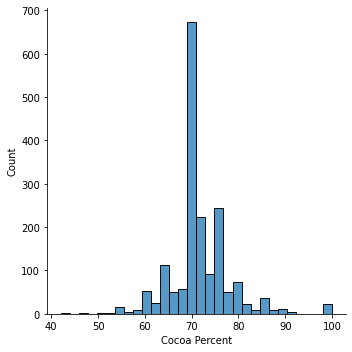

In [60]:
import seaborn as sns
sns.displot(df, x='Cocoa Percent', bins = 30)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با بررسی نمودار بالا مشخص می‌شود که درصد زیادی از شکلات‌ها، دارای ۷۰ درصد کاکائو هستند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ذخیره دادگان
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه داده‌ی مرتب شده را در فایل <code>chocolate_preprocessed.csv</code> و بدون نمایه (<code>index</code>) ذخیره کنید تا بتوانید در مرحله‌ی بعدی از آن استفاده کنید.
</font>
</p>


In [ ]:
#TODO

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تبریک! حالا تمامی مشخصات مرتب و آماده‌ی تحلیل است. برای اطمینان از درستی انجام این مرحله، کد زیر را اجرا و فایل result.zip را ارسال کنید.
</font>
</p>


In [ ]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

np.savez("answers.npz",s = s,cols = cols)
file_names = ["answers.npz", "project1_1.ipynb","chocolate_preprocessed.csv"]
compress(file_names)